In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_stata('karlan_list_2007.dta')
data.head()

,treatment,control,ratio,ratio2,ratio3,size,size25,size50,size100,sizeno,...,redcty,bluecty,pwhite,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban
0,0,1,Control,0,0,Control,0,0,0,0,...,0.0,1.0,0.446493,0.527769,0.317591,2.10,28517.0,0.499807,0.324528,1.0
1,0,1,Control,0,0,Control,0,0,0,0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,1,0,0,"$100,000",0,0,1,0,...,0.0,1.0,0.935706,0.011948,0.276128,2.48,51175.0,0.721941,0.192668,1.0
3,1,0,1,0,0,Unstated,0,0,0,1,...,1.0,0.0,0.888331,0.010760,0.279412,2.65,79269.0,0.920431,0.412142,1.0
4,1,0,1,0,0,"$50,000",0,1,0,0,...,0.0,1.0,0.759014,0.127421,0.442389,1.85,40908.0,0.416072,0.439965,1.0


In [4]:
df = data.describe(include='all')
df

,treatment,control,ratio,ratio2,ratio3,size,size25,size50,size100,sizeno,...,redcty,bluecty,pwhite,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban
count,50083.000000,50083.000000,50083,50083.000000,50083.000000,50083,50083.000000,50083.000000,50083.000000,50083.000000,...,49978.000000,49978.000000,48217.000000,48047.000000,48217.000000,48221.000000,48209.000000,48214.000000,48215.000000,48217.000000
unique,NaN,NaN,4,NaN,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Control,NaN,NaN,Control,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,16687,NaN,NaN,16687,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.666813,0.333187,NaN,0.222311,0.222211,NaN,0.166723,0.166623,0.166723,0.166743,...,0.510245,0.488715,0.819599,0.086710,0.321694,2.429012,54815.700533,0.669418,0.391661,0.871968
std,0.471357,0.471357,NaN,0.415803,0.415736,NaN,0.372732,0.372643,0.372732,0.372750,...,0.499900,0.499878,0.168561,0.135868,0.103039,0.378115,22027.316665,0.193405,0.186599,0.258654
min,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.009418,0.000000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.755845,0.014729,0.258311,2.210000,39181.000000,0.560222,0.235647,0.884929
50%,1.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.872797,0.036554,0.305534,2.440000,50673.000000,0.712296,0.373744,1.000000
75%,1.000000,1.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.938827,0.090882,0.369132,2.660000,66005.000000,0.816798,0.530036,1.000000


In [5]:
df['amount']

count     50083.000000
unique             NaN
top                NaN
freq               NaN
mean          0.915694
std           8.709199
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         400.000000
Name: amount, dtype: float64

In [6]:
from scipy import stats
# for mrm2
df_treatment = data[data['treatment'] == 1]['mrm2'].dropna()
df_control = data[data['treatment'] == 0]['mrm2'].dropna()

t_stat, p_val = stats.ttest_ind(df_treatment, df_control, equal_var=True)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")


T-statistic: 0.119
P-value: 0.9049


In [ ]:
import numpy as np

mean_diff = df_treatment.mean() - df_control.mean()
n1, n2 = len(df_treatment), len(df_control)
s1, s2 = df_treatment.std(ddof=1), df_control.std(ddof=1)

sp = np.sqrt(((n1 - 1)*s1**2 + (n2 - 1)*s2**2) / (n1 + n2 - 2))
se = sp * np.sqrt(1/n1 + 1/n2)

t_crit = stats.t.ppf(0.975, df=n1 + n2 - 2)
ci_low = mean_diff - t_crit * se
ci_high = mean_diff + t_crit * se

print(f"\nMean Difference: {mean_diff:.3f}")
print(f"95% Confidence Interval: ({ci_low:.3f}, {ci_high:.3f})")


Mean Difference: 0.014
95% Confidence Interval: (-0.211, 0.238)


In [ ]:
import statsmodels.api as sm
df_clean = data[['mrm2', 'treatment']].dropna()
X = sm.add_constant(df_clean['treatment']) 
y = df_clean['mrm2']
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   mrm2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01428
Date:                Tue, 22 Apr 2025   Prob (F-statistic):              0.905
Time:                        15:11:15   Log-Likelihood:            -1.9585e+05
No. Observations:               50082   AIC:                         3.917e+05
Df Residuals:                   50080   BIC:                         3.917e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9981      0.094    138.979      0.0

In [9]:
# for freq
df_treatment = data[data['treatment'] == 1]['freq'].dropna()
df_control = data[data['treatment'] == 0]['freq'].dropna()

t_stat, p_val = stats.ttest_ind(df_treatment, df_control, equal_var=True)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")

T-statistic: -0.111
P-value: 0.9117


In [10]:
df['freq']

count     50083.000000
unique             NaN
top                NaN
freq               NaN
mean          8.039355
std          11.394454
min           0.000000
25%           2.000000
50%           4.000000
75%          10.000000
max         218.000000
Name: freq, dtype: float64

In [11]:
import numpy as np

# 計算平均差
mean_diff = df_treatment.mean() - df_control.mean()

# 樣本數與標準差
n1, n2 = len(df_treatment), len(df_control)
s1, s2 = df_treatment.std(ddof=1), df_control.std(ddof=1)

# 合併標準差（pooled standard deviation）
sp = np.sqrt(((n1 - 1)*s1**2 + (n2 - 1)*s2**2) / (n1 + n2 - 2))

# 標準誤
se = sp * np.sqrt(1/n1 + 1/n2)

# 95% 信賴區間
t_crit = stats.t.ppf(0.975, df=n1 + n2 - 2)
ci_low = mean_diff - t_crit * se
ci_high = mean_diff + t_crit * se

print(f"\nMean Difference: {mean_diff:.3f}")
print(f"95% Confidence Interval: ({ci_low:.3f}, {ci_high:.3f})")


Mean Difference: -0.012
95% Confidence Interval: (-0.224, 0.200)


In [12]:
df_clean = data[['freq', 'treatment']].dropna()
# 加入常數項（intercept）
X = sm.add_constant(df_clean['treatment'])  # 會產生兩個欄位：常數 + treatment
y = df_clean['freq']
# 執行 OLS 線性回歸
model = sm.OLS(y, X).fit()

# 印出完整結果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   freq   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01230
Date:                Tue, 22 Apr 2025   Prob (F-statistic):              0.912
Time:                        17:58:28   Log-Likelihood:            -1.9292e+05
No. Observations:               50083   AIC:                         3.858e+05
Df Residuals:                   50081   BIC:                         3.859e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0473      0.088     91.231      0.0

In [13]:
# for amountchange
df_treatment = data[data['treatment'] == 1]['amountchange'].dropna()
df_control = data[data['treatment'] == 0]['amountchange'].dropna()

t_stat, p_val = stats.ttest_ind(df_treatment, df_control, equal_var=True)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")

T-statistic: 0.527
P-value: 0.5982


In [14]:
import numpy as np

# 計算平均差
mean_diff = df_treatment.mean() - df_control.mean()

# 樣本數與標準差
n1, n2 = len(df_treatment), len(df_control)
s1, s2 = df_treatment.std(ddof=1), df_control.std(ddof=1)

# 合併標準差（pooled standard deviation）
sp = np.sqrt(((n1 - 1)*s1**2 + (n2 - 1)*s2**2) / (n1 + n2 - 2))

# 標準誤
se = sp * np.sqrt(1/n1 + 1/n2)

# 95% 信賴區間
t_crit = stats.t.ppf(0.975, df=n1 + n2 - 2)
ci_low = mean_diff - t_crit * se
ci_high = mean_diff + t_crit * se

print(f"\nMean Difference: {mean_diff:.3f}")
print(f"95% Confidence Interval: ({ci_low:.3f}, {ci_high:.3f})")


Mean Difference: 6.331
95% Confidence Interval: (-17.216, 29.877)


In [15]:
df['amountchange']

count      50083.000000
unique              NaN
top                 NaN
freq                NaN
mean         -52.672016
std         1267.238647
min      -200412.125000
25%          -50.000000
50%          -30.000000
75%          -25.000000
max          275.000000
Name: amountchange, dtype: float64

In [16]:
# for female
import pandas as pd
import numpy as np

df_treatment = data[data['treatment'] == 1]['female'].dropna()
df_control = data[data['treatment'] == 0]['female'].dropna()

t_stat, p_val = stats.ttest_ind(df_treatment, df_control, equal_var=True)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")

mean_diff = df_treatment.mean() - df_control.mean()
n1, n2 = len(df_treatment), len(df_control)
s1, s2 = df_treatment.std(ddof=1), df_control.std(ddof=1)

sp = np.sqrt(((n1 - 1)*s1**2 + (n2 - 1)*s2**2) / (n1 + n2 - 2))
se = sp * np.sqrt(1/n1 + 1/n2)

t_crit = stats.t.ppf(0.975, df=n1 + n2 - 2)
ci_low = mean_diff - t_crit * se
ci_high = mean_diff + t_crit * se

print(f"\nMean Difference: {mean_diff:.3f}")
print(f"95% Confidence Interval: ({ci_low:.3f}, {ci_high:.3f})")

T-statistic: -1.758
P-value: 0.0787

Mean Difference: -0.008
95% Confidence Interval: (-0.016, 0.001)


In [17]:
df['female']

count     48972.000000
unique             NaN
top                NaN
freq               NaN
mean          0.277669
std           0.447854
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: female, dtype: float64

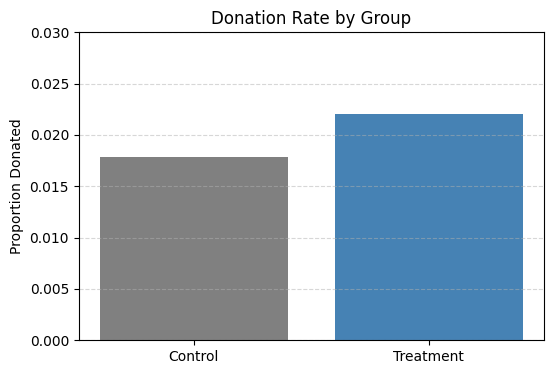

In [22]:
import matplotlib.pyplot as plt

grouped = data.groupby('treatment')['gave'].mean()

grouped.index = ['Control', 'Treatment']

plt.figure(figsize=(6, 4))
plt.bar(grouped.index, grouped.values, color=["gray", "steelblue"])
plt.ylabel('Proportion Donated')
plt.title('Donation Rate by Group')
plt.ylim(0, 0.03)  # 因為捐款率很低，設定 y 軸比較清楚
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [19]:
# for whether they donate or not
import pandas as pd
import numpy as np

df_treatment = data[data['treatment'] == 1]['gave'].dropna()
df_control = data[data['treatment'] == 0]['gave'].dropna()

t_stat, p_val = stats.ttest_ind(df_treatment, df_control, equal_var=True)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")

mean_diff = df_treatment.mean() - df_control.mean()
n1, n2 = len(df_treatment), len(df_control)
s1, s2 = df_treatment.std(ddof=1), df_control.std(ddof=1)

sp = np.sqrt(((n1 - 1)*s1**2 + (n2 - 1)*s2**2) / (n1 + n2 - 2))
se = sp * np.sqrt(1/n1 + 1/n2)

t_crit = stats.t.ppf(0.975, df=n1 + n2 - 2)
ci_low = mean_diff - t_crit * se
ci_high = mean_diff + t_crit * se

print(f"\nMean Difference: {mean_diff:.3f}")
print(f"95% Confidence Interval: ({ci_low:.3f}, {ci_high:.3f})")

T-statistic: 3.101
P-value: 0.0019

Mean Difference: 0.004
95% Confidence Interval: (0.002, 0.007)


In [20]:
df_clean = data[['gave', 'treatment']].dropna()
# 加入常數項（intercept）
X = sm.add_constant(df_clean['treatment'])  # 會產生兩個欄位：常數 + treatment
y = df_clean['gave']
# 執行 OLS 線性回歸
model = sm.OLS(y, X).fit()

# 印出完整結果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.618
Date:                Tue, 22 Apr 2025   Prob (F-statistic):            0.00193
Time:                        19:56:19   Log-Likelihood:                 26630.
No. Observations:               50083   AIC:                        -5.326e+04
Df Residuals:                   50081   BIC:                        -5.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0179      0.001     16.225      0.0

In [21]:
import pandas as pd
import statsmodels.api as sm

df_clean = data[['gave', 'treatment']].dropna()

X = sm.add_constant(df_clean['treatment'])
y = df_clean['gave']

probit_model = sm.Probit(y, X).fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.100443
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   gave   No. Observations:                50083
Model:                         Probit   Df Residuals:                    50081
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:               0.0009783
Time:                        20:25:33   Log-Likelihood:                -5030.5
converged:                       True   LL-Null:                       -5035.4
Covariance Type:            nonrobust   LLR p-value:                  0.001696
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1001      0.023    -90.073      0.000      -2.146      -2.054
treatment      0.0868      0.

In [24]:
data

,treatment,control,ratio,ratio2,ratio3,size,size25,size50,size100,sizeno,...,redcty,bluecty,pwhite,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban
0,0,1,Control,0,0,Control,0,0,0,0,...,0.0,1.0,0.446493,0.527769,0.317591,2.10,28517.0,0.499807,0.324528,1.000000
1,0,1,Control,0,0,Control,0,0,0,0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,1,0,0,"$100,000",0,0,1,0,...,0.0,1.0,0.935706,0.011948,0.276128,2.48,51175.0,0.721941,0.192668,1.000000
3,1,0,1,0,0,Unstated,0,0,0,1,...,1.0,0.0,0.888331,0.010760,0.279412,2.65,79269.0,0.920431,0.412142,1.000000
4,1,0,1,0,0,"$50,000",0,1,0,0,...,0.0,1.0,0.759014,0.127421,0.442389,1.85,40908.0,0.416072,0.439965,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50078,1,0,1,0,0,"$25,000",1,0,0,0,...,0.0,1.0,0.872797,0.089959,0.257265,2.13,45047.0,0.771316,0.263744,1.000000
50079,0,1,Control,0,0,Control,0,0,0,0,...,0.0,1.0,0.688262,0.108889,0.288792,2.67,74655.0,0.741931,0.586466,1.000000
50080,0,1,Control,0,0,Control,0,0,0,0,...,1.0,0.0,0.900000,0.021311,0.178689,2.36,26667.0,0.778689,0.107930,0.000000
50081,1,0,3,0,1,Unstated,0,0,0,1,...,1.0,0.0,0.917206,0.008257,0.225619,2.57,39530.0,0.733988,0.184768,0.634903


In [26]:
df_ratio = data[(data['treatment'] == 1) & (data['ratio'].notnull()) & (data['gave'].notnull())]

gave_11 = df_ratio[df_ratio['ratio'] == 1]['gave'].dropna()
gave_21 = df_ratio[df_ratio['ratio'] == 2]['gave'].dropna()
gave_31 = df_ratio[df_ratio['ratio'] == 3]['gave'].dropna()

# 比較各組平均捐款率
mean_11 = gave_11.mean()
mean_21 = gave_21.mean()
mean_31 = gave_31.mean()

print("Donation Rates:")
print(f"1:1  = {mean_11:.4f}")
print(f"2:1  = {mean_21:.4f}")
print(f"3:1  = {mean_31:.4f}")

# T-tests
print("\nT-test Results:")
t_21, p_21 = stats.ttest_ind(gave_21, gave_11, equal_var=False)
t_31, p_31 = stats.ttest_ind(gave_31, gave_11, equal_var=False)
t_32, p_32 = stats.ttest_ind(gave_31, gave_21, equal_var=False)

print(f"2:1 vs 1:1 → T = {t_21:.3f}, p = {p_21:.4f}")
print(f"3:1 vs 1:1 → T = {t_31:.3f}, p = {p_31:.4f}")
print(f"3:1 vs 2:1 → T = {t_32:.3f}, p = {p_32:.4f}")

Donation Rates:
1:1  = 0.0207
2:1  = 0.0226
3:1  = 0.0227

T-test Results:
2:1 vs 1:1 → T = 0.965, p = 0.3345
3:1 vs 1:1 → T = 1.015, p = 0.3101
3:1 vs 2:1 → T = 0.050, p = 0.9600


In [32]:
df_ratio = data[(data['treatment'] == 1) & (data['ratio'].isin([1,2,3])) & (data['gave'].notnull())]

df_ratio['ratio2'] = (df_ratio['ratio'] == 2).astype(int)
df_ratio['ratio3'] = (df_ratio['ratio'] == 3).astype(int)
X = sm.add_constant(df_ratio[['ratio2', 'ratio3']])
y = df_ratio['gave']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6454
Date:                Tue, 22 Apr 2025   Prob (F-statistic):              0.524
Time:                        23:39:57   Log-Likelihood:                 16688.
No. Observations:               33396   AIC:                        -3.337e+04
Df Residuals:                   33393   BIC:                        -3.334e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0207      0.001     14.912      0.0

/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_56870/1714721735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratio['ratio2'] = (df_ratio['ratio'] == 2).astype(int)
/var/folders/4_/b_ln9nlx3j19x_2nmv9t3rd40000gn/T/ipykernel_56870/1714721735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratio['ratio3'] = (df_ratio['ratio'] == 3).astype(int)


In [36]:
# directly from data
gave_11 = df_ratio[df_ratio['ratio'] == 1]['gave'].mean()
gave_21 = df_ratio[df_ratio['ratio'] == 2]['gave'].mean()
gave_31 = df_ratio[df_ratio['ratio'] == 3]['gave'].mean()

# 算差值
print("Direct from data:")
print(f"2:1 - 1:1 = {gave_21 - gave_11:.4f}")
print(f"3:1 - 1:1 = {gave_31 - gave_11:.4f}")
print(f"3:1 - 2:1 = {gave_31 - gave_21:.4f}")

Direct from data:
2:1 - 1:1 = 0.0019
3:1 - 1:1 = 0.0020
3:1 - 2:1 = 0.0001


In [ ]:
# from model
b2 = model.params['ratio2']
b3 = model.params['ratio3']

print("\nFrom regression coefficients:")
print(f"2:1 - 1:1 = {b2:.4f}")        # b2 就是 2:1 相對於 1:1 的差
print(f"3:1 - 1:1 = {b3:.4f}")        # b3 就是 3:1 相對於 1:1 的差
print(f"3:1 - 2:1 = {b3 - b2:.4f}")  # b3 相對於 1:1，再減去 b2


From regression coefficients:
2:1 - 1:1 = 0.0019
3:1 - 1:1 = 0.0020
3:1 - 2:1 = 0.0001


In [37]:
amount_t = data[data['treatment'] == 1]['amount'].dropna()
amount_c = data[data['treatment'] == 0]['amount'].dropna()

t_stat, p_val = stats.ttest_ind(amount_t, amount_c, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.4f}")
print(f"Mean difference: {amount_t.mean() - amount_c.mean():.3f}")

T-statistic: 1.918
P-value: 0.0551
Mean difference: 0.154


In [38]:
df_positive = data[(data['amount'] > 0) & data['treatment'].notnull()]

X = sm.add_constant(df_positive['treatment'])
y = df_positive['amount']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3374
Date:                Wed, 23 Apr 2025   Prob (F-statistic):              0.561
Time:                        00:05:31   Log-Likelihood:                -5326.8
No. Observations:                1034   AIC:                         1.066e+04
Df Residuals:                    1032   BIC:                         1.067e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.5403      2.423     18.792      0.0

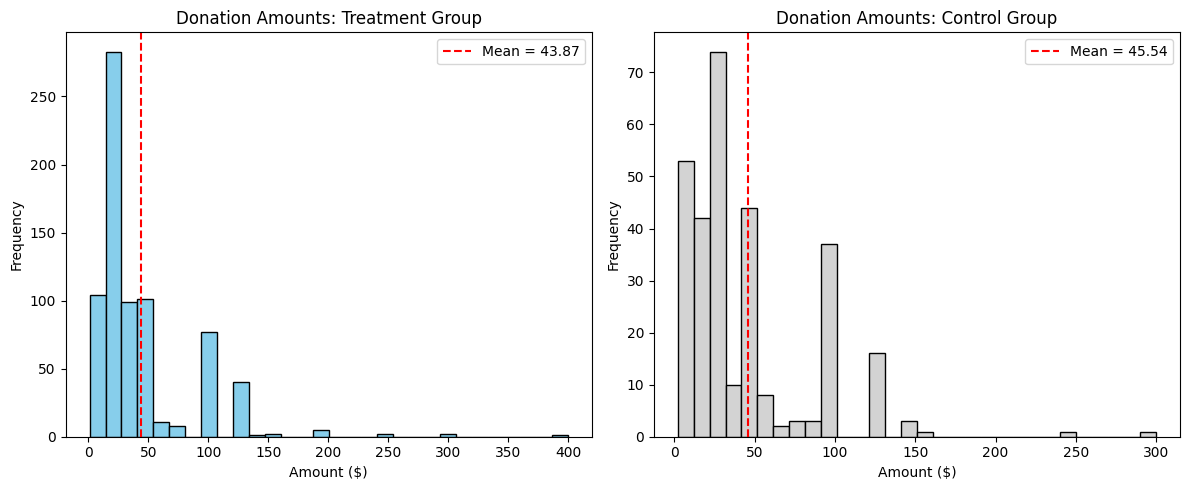

In [39]:
df_positive = data[(data['amount'] > 0) & data['treatment'].notnull()]

# 分成 treatment 和 control
amount_t = df_positive[df_positive['treatment'] == 1]['amount']
amount_c = df_positive[df_positive['treatment'] == 0]['amount']

# 計算平均
mean_t = amount_t.mean()
mean_c = amount_c.mean()

# 畫圖：Treatment group
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(amount_t, bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_t, color='red', linestyle='--', label=f'Mean = {mean_t:.2f}')
plt.title('Donation Amounts: Treatment Group')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.legend()

# 畫圖：Control group
plt.subplot(1, 2, 2)
plt.hist(amount_c, bins=30, color='lightgray', edgecolor='black')
plt.axvline(mean_c, color='red', linestyle='--', label=f'Mean = {mean_c:.2f}')
plt.title('Donation Amounts: Control Group')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

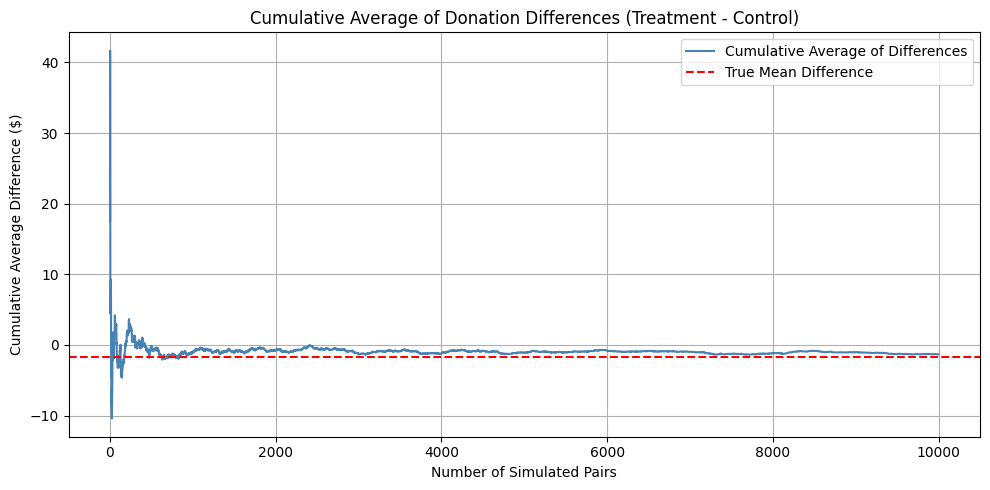

In [40]:
control = data[(data['treatment'] == 0) & (data['amount'] > 0)]['amount'].values
treatment = data[(data['treatment'] == 1) & (data['amount'] > 0)]['amount'].values

# Step 1: 抽樣模擬
np.random.seed(42)
draws_control = np.random.choice(control, 100000, replace=True)
draws_treatment = np.random.choice(treatment, 10000, replace=True)

# Step 2: 算出 10,000 個差異值（對應 index）
differences = draws_treatment - draws_control[:10000]

# Step 3: 算累積平均
cumulative_avg = np.cumsum(differences) / np.arange(1, len(differences) + 1)

# Step 4: 畫圖
plt.figure(figsize=(10, 5))
plt.plot(cumulative_avg, color='steelblue', label='Cumulative Average of Differences')
plt.axhline(np.mean(treatment) - np.mean(control), color='red', linestyle='--', label='True Mean Difference')
plt.title('Cumulative Average of Donation Differences (Treatment - Control)')
plt.xlabel('Number of Simulated Pairs')
plt.ylabel('Cumulative Average Difference ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

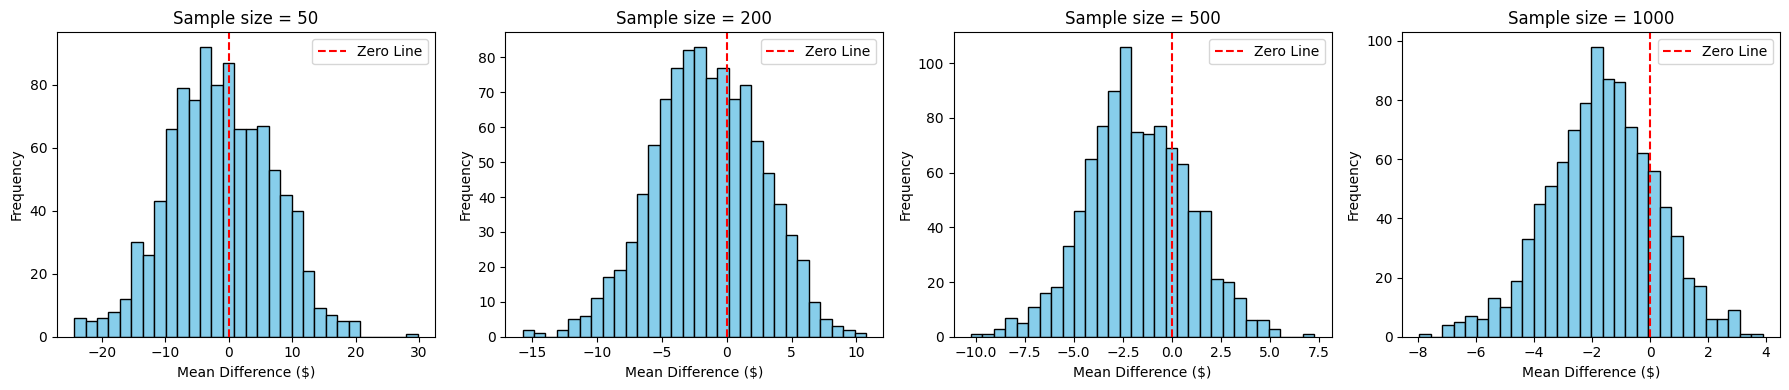

In [43]:
control = data[(data['treatment'] == 0) & (data['amount'] > 0)]['amount'].values
treatment = data[(data['treatment'] == 1) & (data['amount'] > 0)]['amount'].values

# 模擬參數
sample_sizes = [50, 200, 500, 1000]
n_simulations = 1000

# 畫圖
plt.figure(figsize=(18, 4))

for i, size in enumerate(sample_sizes):
    diff_list = []
    for _ in range(n_simulations):
        draw_c = np.random.choice(control, size, replace=True)
        draw_t = np.random.choice(treatment, size, replace=True)
        diff = np.mean(draw_t) - np.mean(draw_c)
        diff_list.append(diff)

    # 畫圖
    plt.subplot(1, 4, i+1)
    plt.hist(diff_list, bins=30, color='skyblue', edgecolor='black')
    plt.axvline(x=0, color='red', linestyle='--', label='Zero Line')
    plt.title(f'Sample size = {size}')
    plt.xlabel('Mean Difference ($)')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()